In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
import pickle
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../cow.py
%run ../optimize_pkg_2.py

## Short Blocklength

In [5]:
protocol_target = 10**(-9)
rx_SNR_range = arange(0, 12, 0.01)
# tx_SNR_range = arange(30, -10*log10(protocol_target), 0.01)
protocolbit = 4200
start_node, end_node = 2, 6
user_range = arange(start_node, end_node, 1)

In [6]:
filepath_down = "../data_tables/short_block_test/default/down/n"
filepath_up = "../data_tables/short_block_test/default/up/n"

### Optimize 1

In [31]:
%%time
%run ../optimize_pkg_2.py
optimize_1_data_2 = zeros((5, 7))
tx_SNR_start = 30
precision = -2
# tx_SNR_range = arange(32, 60, 0.01)
for N in user_range[::-1]:
    optimize_1_data_2[N-1] = optimize_1(N, tx_SNR_start, filepath_down, filepath_up, precision, protocolbit)
#     print N, optimize_1_data_2[N-1]

CPU times: user 14.7 s, sys: 163 ms, total: 14.9 s
Wall time: 15.2 s


In [97]:
print optimize_1_data_2
dct = {'entry':optimize_1_data_2}
print dct

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  5.09400000e+01   2.44000000e+00   3.55000000e+00   3.55000000e+00
    8.60089696e-11   9.48693257e-11   9.48693257e-11]
 [  3.86500000e+01   3.34000000e+00   5.31000000e+00   5.31000000e+00
    8.67846335e-11   9.57194967e-11   9.57194967e-11]
 [  3.44400000e+01   5.05000000e+00   8.29000000e+00   8.29000000e+00
    9.50248074e-11   9.82982445e-11   9.82982445e-11]
 [  3.29200000e+01   1.11800000e+01   1.09100000e+01   1.09100000e+01
    9.41287048e-11   9.55602264e-11   9.55602264e-11]]
{'entry': array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  5.09400000e+01,   2.44000000e+00,   3.55000000e+00,
          3.55000000e+00,   8.60089696e-11,   9.48693257e-11,
          9.48693257e-11],
       [  3.86500000e+01,   3.34000000e+00,   5.31000000e+00,
     

In [29]:
print arange(0, -3, -1)
print 10**arange(0.0, -3, -1)

[ 0 -1 -2]
[ 1.    0.1   0.01]


### Optimize 3

In [34]:
%%time
%run ../optimize_pkg_2.py
optimize_3_data_2 = zeros((5, 6))
tx_SNR_range = arange(30, 60, 1)
rx_SNR_start = 1
# tx_SNR_range = arange(32, 60, 0.01)
for N in user_range[::-1]:
    optimize_3_data_2[N-1] = optimize_3(N, rx_SNR_start, tx_SNR_range, filepath_down, filepath_up, protocolbit, 1)
    print N, optimize_3_data_2[N-1]

5 [  6.00000000e+01   6.00000000e+00   1.10000000e+01   2.32555392e-02
   4.62401570e-03   5.59116087e-11]
4 [  6.00000000e+01   4.00000000e+00   8.00000000e+00   3.13583564e-06
   9.73949449e-03   6.31821039e-10]
3 [  6.00000000e+01   3.00000000e+00   5.00000000e+00   9.37341948e-09
   4.32371055e-04   1.27944396e-09]
2 [  6.00000000e+01   2.00000000e+00   3.00000000e+00   5.54012442e-08
   1.17768176e-04   3.11859133e-08]
CPU times: user 26min 59s, sys: 10.9 s, total: 27min 10s
Wall time: 27min 40s


<string>:88: RuntimeWarning: divide by zero encountered in log10


In [47]:
%%time
%run ../optimize_pkg_2.py
optimize_3_data_2 = zeros((5, 6))
tx_SNR_range = arange(30, 70, 5)
rx_SNR_start = 1
# tx_SNR_range = arange(32, 60, 0.01)
for N in [2]:
    optimize_3_data_2[N-1] = optimize_3(N, rx_SNR_start, tx_SNR_range, filepath_down, filepath_up, protocolbit, 5)
    print N, optimize_3_data_2[N-1]

2 [  5.50000000e+01   6.00000000e+00   6.00000000e+00   4.39023894e-53
   3.04254205e-27   3.04254205e-27]
CPU times: user 27.3 s, sys: 267 ms, total: 27.6 s
Wall time: 28.2 s


<string>:88: RuntimeWarning: divide by zero encountered in log10


In [59]:
tSNR = 3
rSNRdu = 3
rSNR3 = 5

h_du = 10**((rSNRdu - tSNR)/10) # linear fade
h_xor = 10**((rSNR3 - tSNR)/10)
# Probability fade is bad
p_f1 = p_f2 = 1 - np.exp(-h_du)
p_f3 = 1 - np.exp(h_du-h_xor) if h_xor > h_du else 0

print h_du, h_xor
print p_f1, p_f3

1.0 1.58489319246
0.632120558829 0.442834631904


In [66]:
%%time
%run ../optimize_pkg_2.py
optimize_3_data_2 = zeros((5, 6))
tx_SNR_range = arange(30, 70, 1)
rx_SNR_start = 1
# tx_SNR_range = arange(32, 60, 0.01)
for N in [2]:
    optimize_3_data_2[N-1] = optimize_3(N, rx_SNR_start, tx_SNR_range, filepath_down, filepath_up, protocolbit, 5)
    print N, optimize_3_data_2[N-1]

2 [  5.50000000e+01   6.00000000e+00   6.00000000e+00   4.39023894e-53
   3.04254205e-27   3.04254205e-27]
CPU times: user 27.2 s, sys: 167 ms, total: 27.4 s
Wall time: 27.8 s


<string>:88: RuntimeWarning: divide by zero encountered in log10


In [69]:
%%time
%run ../optimize_pkg_2.py
optimize_3_data_2 = zeros((5, 6))
tx_SNR_range = arange(30, 70, 1)
rx_SNR_start = 1
# tx_SNR_range = arange(32, 60, 0.01)
for N in [5]:
    optimize_3_data_2[N-1] = optimize_3(N, rx_SNR_start, tx_SNR_range, filepath_down, filepath_up, protocolbit, 1)
    print N, optimize_3_data_2[N-1]

5 [  3.20000000e+01   8.00000000e+00   1.00000000e+01   1.51433729e-04
   2.98296695e-05   1.22792898e-08]
CPU times: user 24min 41s, sys: 8.21 s, total: 24min 49s
Wall time: 25min 10s


<string>:88: RuntimeWarning: divide by zero encountered in log10


## Full Blocklength

In [71]:
protocol_target = 10**(-9)
rx_SNR_range = arange(0, 12, 0.01)
# tx_SNR_range = arange(30, -10*log10(protocol_target), 0.01)
protocolbit = 4*10**4
start_node, end_node = 2, 36
user_range = arange(start_node, end_node, 1)

In [70]:
filepath_down = "../data_tables/hs_rs_downlink/n"
filepath_up = "../data_tables/hs_rs_uplink/n"

In [77]:
%%time
%run ../optimize_pkg_2.py
optimize_1_data = zeros((35, 7))
tx_SNR_start = 0
precision = -1
# tx_SNR_range = arange(32, 60, 0.01)
for N in user_range[::-1]:
    optimize_1_data[N-1] = optimize_1(N, tx_SNR_start, filepath_down, filepath_up, precision, protocolbit)
#     print N, optimize_1_data_2[N-1]

CPU times: user 1h 41min 39s, sys: 51.1 s, total: 1h 42min 30s
Wall time: 4h 51min 13s


<string>:92: RuntimeWarning: divide by zero encountered in log10


[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.74000000e+01  -4.60000000e-01  -6.00000000e-02  -6.00000000e-02
    9.86078780e-11   8.53904883e-11   8.53904883e-11]
 [  3.37000000e+01  -3.70000000e-01   3.40000000e-01   3.40000000e-01
    8.44009046e-11   8.57297236e-11   8.57297236e-11]
 [  2.69000000e+01  -2.70000000e-01   7.10000000e-01   7.10000000e-01
    8.77497409e-11   8.20523023e-11   8.20523023e-11]
 [  2.28000000e+01  -1.70000000e-01   1.03000000e+00   1.03000000e+00
    9.27321397e-11   8.78865381e-11   8.78865381e-11]
 [  2.01000000e+01  -8.00000000e-02   1.33000000e+00   1.33000000e+00
    8.24799124e-11   9.27101093e-11   9.27101093e-11]
 [  1.82000000e+01   2.00000000e-02   1.55000000e+00   1.55000000e+00
    9.14957383e-11   9.93763442e-11   9.93763442e-11]
 [  1.68000000e+01   1.30000000e-01   1.90000000e+00   1.90000000e+00
    6.86528182e-11   9.01178423e-11   9.01178423e-11]
 [  1.58

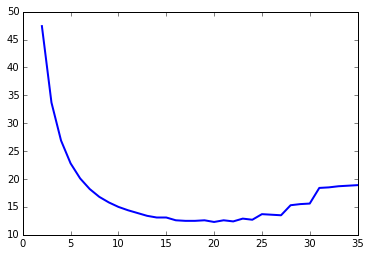

In [78]:
print optimize_1_data

plot(user_range, optimize_1_data[1:,0], lw=2.0)

In [83]:
print optimize_1_data[1:,0]
print ''
print optimize_1_data[1:,1]
print optimize_1_data[1:,2]
print ''
print optimize_1_data[1:,3]

[ 47.4  33.7  26.9  22.8  20.1  18.2  16.8  15.8  15.   14.4  13.9  13.4
  13.1  13.1  12.6  12.5  12.5  12.6  12.3  12.6  12.4  12.9  12.7  13.7
  13.6  13.5  15.3  15.5  15.6  18.4  18.5  18.7  18.8  18.9]

[-0.46 -0.37 -0.27 -0.17 -0.08  0.02  0.13  0.22  0.32  0.43  0.52  0.63
  0.74  0.84  0.96  1.08  1.18  1.31  1.44  1.56  1.71  1.86  1.99  2.16
  2.35  2.51  2.73  2.97  3.21  3.53  3.92  4.37  5.14  6.85]
[ -0.06   0.34   0.71   1.03   1.33   1.55   1.9    2.11   2.44   2.68
   2.98   3.11   3.3    3.8    3.73   4.05   4.39   4.83   4.77   5.31
   5.28   5.97   5.95   6.91   6.89   6.87   8.31   8.29   8.27  10.93
  10.92  10.92  10.92  10.91]

[ -0.06   0.34   0.71   1.03   1.33   1.55   1.9    2.11   2.44   2.68
   2.98   3.11   3.3    3.8    3.73   4.05   4.39   4.83   4.77   5.31
   5.28   5.97   5.95   6.91   6.89   6.87   8.31   8.29   8.27  10.93
  10.92  10.92  10.92  10.91]


In [84]:
%%time
%run ../optimize_pkg_2.py
optimize_1_data_full = zeros((35, 7))
tx_SNR_start = 10
precision = -2
# tx_SNR_range = arange(32, 60, 0.01)
for N in user_range[::-1]:
    optimize_1_data_full[N-1] = optimize_1(N, tx_SNR_start, filepath_down, filepath_up, precision, protocolbit)
#     print N, optimize_1_data_2[N-1]

CPU times: user 2h 15min 11s, sys: 1min 14s, total: 2h 16min 26s
Wall time: 2h 23min 38s


<string>:92: RuntimeWarning: divide by zero encountered in log10


In [87]:
print optimize_1_data_full[1:, 0]
print ''
print optimize_1_data_full[1:,1]
print optimize_1_data_full[1:,2]
print ''
print optimize_1_data_full[1:,3]

[ 47.33  33.68  26.86  22.77  20.08  18.12  16.8   15.71  14.97  14.33
  13.87  13.37  13.01  13.01  12.53  12.46  12.46  12.59  12.26  12.57
  12.33  12.87  12.64  13.64  13.57  13.5   15.26  15.44  15.58  18.38
  18.48  18.62  18.77  18.82]

[-0.46 -0.37 -0.27 -0.17 -0.08  0.02  0.13  0.22  0.32  0.43  0.52  0.63
  0.74  0.84  0.96  1.08  1.18  1.31  1.44  1.56  1.71  1.86  1.99  2.16
  2.35  2.51  2.73  2.97  3.21  3.53  3.92  4.37  5.14  6.85]
[ -0.06   0.34   0.71   1.03   1.33   1.55   1.9    2.11   2.44   2.68
   2.98   3.11   3.3    3.8    3.73   4.05   4.39   4.83   4.77   5.31
   5.28   5.97   5.95   6.91   6.89   6.87   8.31   8.29   8.27  10.93
  10.92  10.92  10.92  10.91]

[ -0.06   0.34   0.71   1.03   1.33   1.55   1.9    2.11   2.44   2.68
   2.98   3.11   3.3    3.8    3.73   4.05   4.39   4.83   4.77   5.31
   5.28   5.97   5.95   6.91   6.89   6.87   8.31   8.29   8.27  10.93
  10.92  10.92  10.92  10.91]


In [103]:
print optimize_1_data_full[:,[0,2,3]]

[[  0.     0.     0.  ]
 [ 47.33  -0.06  -0.06]
 [ 33.68   0.34   0.34]
 [ 26.86   0.71   0.71]
 [ 22.77   1.03   1.03]
 [ 20.08   1.33   1.33]
 [ 18.12   1.55   1.55]
 [ 16.8    1.9    1.9 ]
 [ 15.71   2.11   2.11]
 [ 14.97   2.44   2.44]
 [ 14.33   2.68   2.68]
 [ 13.87   2.98   2.98]
 [ 13.37   3.11   3.11]
 [ 13.01   3.3    3.3 ]
 [ 13.01   3.8    3.8 ]
 [ 12.53   3.73   3.73]
 [ 12.46   4.05   4.05]
 [ 12.46   4.39   4.39]
 [ 12.59   4.83   4.83]
 [ 12.26   4.77   4.77]
 [ 12.57   5.31   5.31]
 [ 12.33   5.28   5.28]
 [ 12.87   5.97   5.97]
 [ 12.64   5.95   5.95]
 [ 13.64   6.91   6.91]
 [ 13.57   6.89   6.89]
 [ 13.5    6.87   6.87]
 [ 15.26   8.31   8.31]
 [ 15.44   8.29   8.29]
 [ 15.58   8.27   8.27]
 [ 18.38  10.93  10.93]
 [ 18.48  10.92  10.92]
 [ 18.62  10.92  10.92]
 [ 18.77  10.92  10.92]
 [ 18.82  10.91  10.91]]


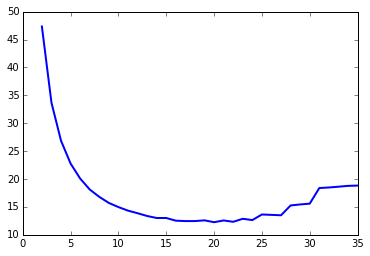

In [88]:
plot(user_range, optimize_1_data_full[1:,0], lw=2.0)

In [91]:
print max(optimize_1_data_full[1:,1])
print max(optimize_1_data_full[1:,2])
print max(optimize_1_data_full[1:,3])

6.85
10.93
10.93


In [93]:
%%time
%run ../optimize_pkg_2.py
N = 35
tSNR_start = 18
rSNR_start = 11
rSNR3_start = 11

protocol_target = 10**(-9)
protocolbit = 4*10**4
d_rSNR = 0.1
precision = -1

filepath_down = "../data_tables/hs_rs_downlink/n"
filepath_up = "../data_tables/hs_rs_uplink/n"
# filepath_result = "results/n" + sys.argv[1] + ".txt"

tx_SNR_range = np.arange(tSNR_start, 50, 1)
result = optimize_3(N, rSNR_start, rSNR3_start, tx_SNR_range, filepath_down, filepath_up, protocolbit, d_rSNR, precision)
print result

(18, 11.0, 11.0, array(0.0), array(5.591160867468625e-11), array(5.591160867468625e-11))
CPU times: user 41 s, sys: 658 ms, total: 41.7 s
Wall time: 44.3 s


<string>:93: RuntimeWarning: divide by zero encountered in log10


-5.0
9.99
1.9068965251e-34


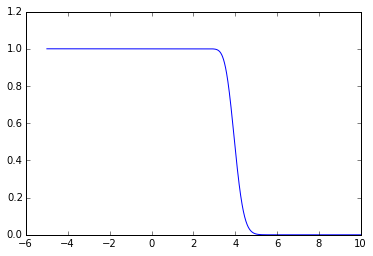

In [96]:
downTable = load_table(filepath_down+str(N)+extension)
plot(downTable[0], downTable[1])
print downTable[0][0]
print downTable[0][-1]
print downTable[1][-1]

In [ ]:
module load python/2.7.8
module load scipy/0.14.0
module load numpy/1.9.0


## Test of Opt 3

In [98]:
def optimize_3_test(N, rx_SNR_start, rSNR3_start, tx_SNR_range, filepath_down, filepath_up, protocol=4*10**4, d_rSNR=0.1, precision=-2):
    downbit = upbit = xorbit = protocol/3
    downTable = load_table(filepath_down+str(N)+extension)
    downfunc = interp1d(downTable[0], downTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
    upTable = load_table(filepath_up+str(N)+extension)
    upfunc = interp1d(upTable[0], upTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

    xor_table = load_table(filepath_up+str(N)+extension)
    xor_func = interp1d(xor_table[0], xor_table[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

    # tSNR_start = tx_SNR_range[0]
    rSNR3 = rSNR3_start
    p_add_3 = xor_func(rSNR3)
    rSNRdu = rx_SNR_start

    for dSNR in 10**np.arange(0.0, precision-1, -1):
        for tSNR in tx_SNR_range:
            xor_opt = xor_analysis_new(N, tSNR, rSNRdu, rSNR3, downfunc(rSNRdu), upfunc(rSNRdu), xor_func(rSNR3))
            if 1-xor_opt <= protocol_target:
                return (tSNR, rSNRdu, rSNR3, downfunc(rSNRdu), upfunc(rSNRdu), p_add_3)

In [ ]:
%%time
z = optimize_3_test(35, rx_SNR_start, rSNR3_start, tx_SNR_range, filepath_down, filepath_up, protocol=4*10**4, d_rSNR=0.1, precision=-2)